# Mapa de Calor - Projeção de Receitas de Medicamentos Controlados entre 2017-2021

Este projeto visa buscar uma relação de vendas de alguns medicamentos controlados ansiolíticos e antidepressivos, assim
como alguns remédios do "Kit-Covid" em um período de pré a pós pandemia (2017-2021). O mapa de calor especificará quais medicamentos controlados foram receitados em cada município,

In [ ]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
#Definindo as variáveis dos arquivos CSV

url = 'https://stgdwsngpcpd01.blob.core.windows.net/dados-abertos/EDA_Manipulados_201707.csv'
url2 = 'https://stgdwsngpcpd01.blob.core.windows.net/dados-abertos/EDA_Manipulados_201807.csv'
url3 = 'https://stgdwsngpcpd01.blob.core.windows.net/dados-abertos/EDA_Manipulados_201907.csv'
url4 = 'https://stgdwsngpcpd01.blob.core.windows.net/dados-abertos/EDA_Manipulados_202007.csv'
url5 = 'https://stgdwsngpcpd01.blob.core.windows.net/dados-abertos/EDA_Manipulados_202107.csv'

df = pd.read_csv(url, encoding = 'cp1252', sep = ';')
df2 = pd.read_csv(url2, encoding = 'cp1252', sep = ';')
df3 = pd.read_csv(url3, encoding = 'cp1252', sep = ';')
df4 = pd.read_csv(url4, encoding = 'cp1252', sep = ';')
df5 = pd.read_csv(url5, encoding = 'cp1252', sep = ';')


In [ ]:
#Utilizando a variável tabela_unica para concatenar os CSV em uma única planilha

tabela_unica = pd.concat([df,df2,df3,df4,df5], axis=0, join='inner')

In [ ]:
#Filtrando os estados do Sudeste
estados = ['SP',
           'RJ',
           'ES',
           'MG'
    ]

df_estados = tabela_unica[tabela_unica['UF_VENDA'].isin(estados)]

In [ ]:
#Filtrando os remédios controlados
drugs = ['ZOLPIDEM',
        'CLONAZEPAM',
        'BROMAZEPAM',
        'LORAZEPAM',
        'FLUOXETINA',
        'ESCITALOPRAM',
        'MIRTAZAPINA',
        'DULOXETINA',
        'IVERMECTINA',
        'CLOROQUINA',
        'HIDROXICLOROQUINA',
        'AZITROMICINA']

df_drugs = df_estados[df_estados['PRINCIPIO_ATIVO'].isin(drugs)]

In [ ]:
#Modificando as siglas da UF para o nome completo (evitar erros na geração do HeatMap)
df_drugs.replace({"SP":"SAO PAULO - SP, Brasil - ",
                  "RJ":"RIO DE JANEIRO - RJ,  Brasil - ",
                  "ES":"ESPIRITO SANTO - ES,  Brasil - ",
                  "MG":"MINAS GERAIS- MG,  Brasil - ",
                 }, inplace=True)

In [ ]:
#Concatenando a coluna da UF e do Município (evitar erros na geração do HeatMap)
df_drugs['UF'] = df_drugs['UF_VENDA'].map(str) + '-' + df_drugs['MUNICIPIO_VENDA'].map(str)
display(df_drugs)

In [ ]:
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df_drugs["UF_geolocalizacao"] = df_drugs["UF"].apply(geocode)

In [ ]:
df_drugs["UF_latitude"] = df_drugs["UF_geolocalizacao"].apply(lambda loc: loc.latitude if loc else None)
df_drugs["UF_longitude"] = df_drugs["UF_geolocalizacao"].apply(lambda loc: loc.longitude if loc else None)

In [ ]:
df_drugs["UF_geolocalizacao_point"] = df_drugs["UF_geolocalizacao"].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
#Renomeando as colunas

df_drugs.rename(columns={"UF_latitude":"Lat", "UF_longitude":"Lng", "UF_geolocalizacao":"Geocode_Input"}, inplace=True)
df_drugs

In [ ]:
df_drugs=df_drugs.dropna(subset=['Lat'])

df_drugs=df_drugs.dropna(subset=['Lng'])

In [ ]:
#Gerando o mapa de calor

!pip install folium==0.8.2
import folium

m = folium.Map(
    location=[ -3.10719, -60.0261],
    tiles='cartodbdark_matter',
    zoom_start=11
)
mc = MarkerCluster()
    
for index, remedio in df_drugs.iterrows():
  mc.add_child(folium.Marker([remedio['Lat'], remedio['Lng']], 
              popup=str(remedio['Geocode_Input']),
              tooltip=remedio['PRINCIPIO_ATIVO'],
              icon=folium.Icon(icon='book'))).add_to(m)
  
m

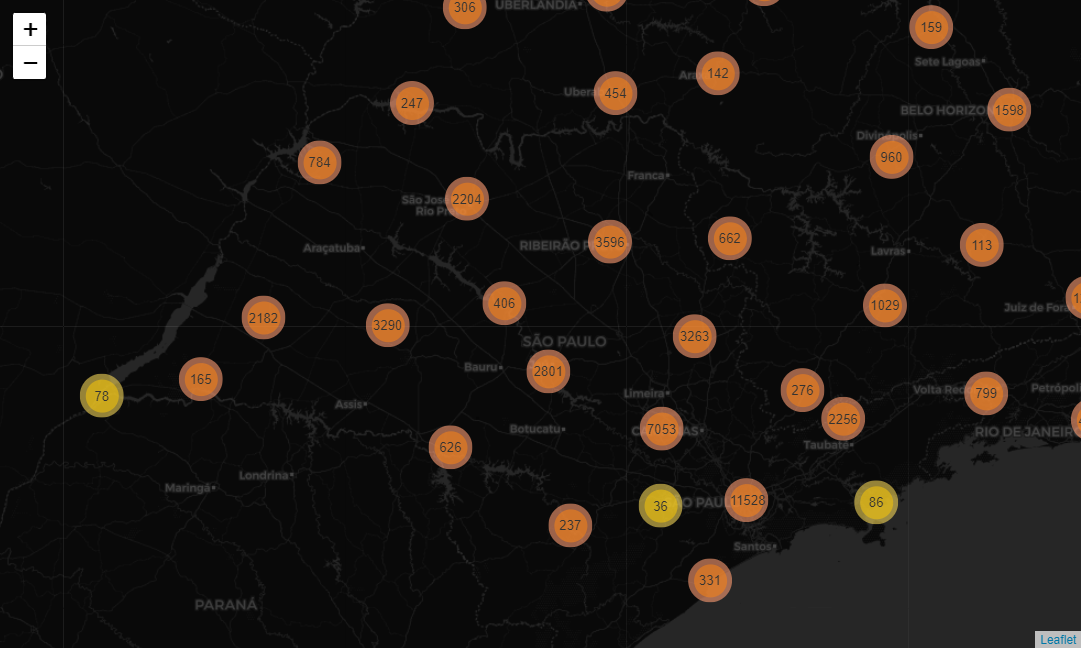

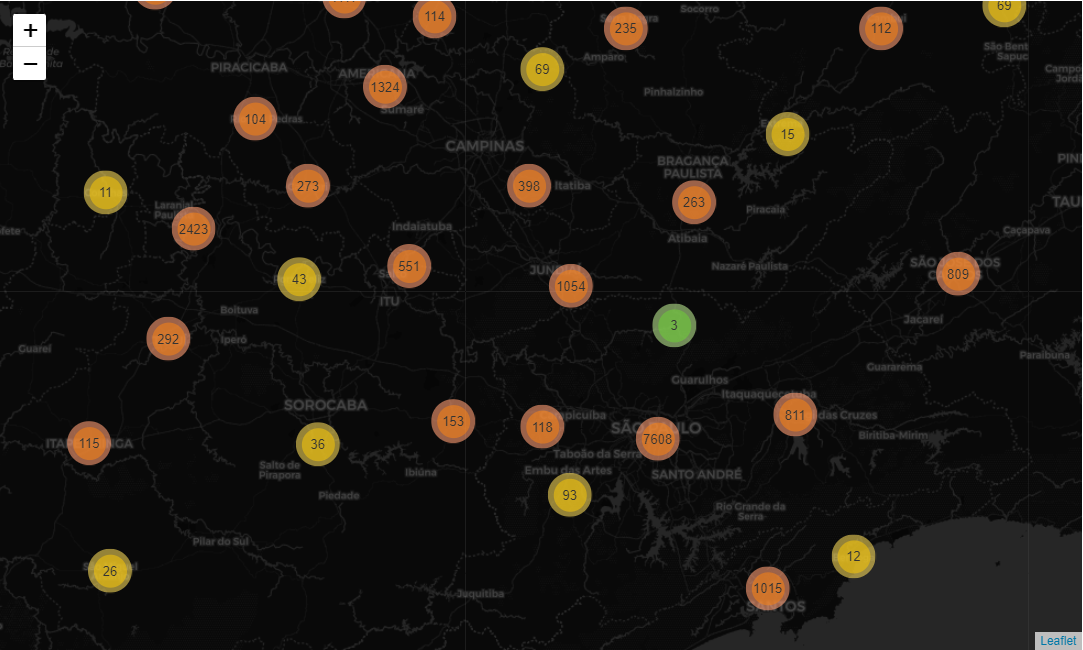

Obs: As imagens são o resultado da geração do mapa de calor.